# Planteamiento

Tenemos una cuadricula de 12x12 en la que la que conocemos la ocupación de las columnas y de las filas, pero no la distribución de la ocupación.

El reto consiste en, dada una ocupación dada, encontrar la distribución en la matriz.

Existen restricciones. La superficie esta cubierta con termométros que hay que rellenar, y tiene que hacerse desde el bulbo hacia el final, sin dejar huecos.

Fill the thermometers with mercury, such that the numbers outside the grid indicate how many cells in each row and column are filled. Mercury always starts filling from the base (circular part) of a thermometer, towards the top.

Este es el escenario:

![puzzle 19](img/puzzle_19_small.png)

# V0: Sin termometros.

La versión cero resuelve el problema sin termometros, es decir, considera solamente la ocupacion y no el "rellenado", con lo que ofrecera soluciones que no se ajustan a las normas, pero permitira tener un resolvedor en el que poner despues la restricciones.

*01* empiezo a usar PyGAD a ver si encuentra la solucion basica sin restricciones.
    Consigo que funcione perfecto, el truco fue en bajar la probabilidad de mutación, al principio trabajaba con mutaciones muy altas,  con lo que la convergencia se veia seriamente comprometida e iba a saltos. La baje, con 0.01 converge siempre a la solución exacta. 
    
*02* refactorizo la 01 antes de pasar a la versión con termómetros
    Demostrada la viabilidad, paso ahora a la version 1 en la que incluyo los temómetros.

# V1: Con termometros

en esta versión incluyo la existencia de los termometros. Esto va a cambiar, fundamentalmente, la función de fitness.  La condición es que se han de rellenar desde el bulbo inicial hasta el final, sin dejar huecos, como si fuera un tubo con fluido.


import numpy as np
import pandas as pd
import time
import pygad

In [3]:
import numpy as np
import pandas as pd
import time
import pygad

# tablero 12x12

In [20]:
#ctes
N_FILAS = 12 # es cuadrado, asi que uso solo una
target_col = np.array([7,5,7,1,7,3,4,4,7,7,7,4])
target_fil = np.array([6,7,6,1,4,3,6,7,6,7,7,3])
tablero = np.zeros(shape =(N_FILAS,N_FILAS))
# Codificamos los termómetros
# fila, columna, mov1,mov2,....mov n.
# movimientos: u: up, d: down, l:left, r:right
# La posición del bulbo está determinada por el par fila-columna, el recorrido del termometro por los movimientos.
t1 =  np.transpose( np.array([0,0,'d','d','d']))
t2 =  np.transpose( np.array([0,1,'r','r','r','r','d','d']))
t3 =  np.transpose( np.array([0,10,'l','l','d','d'])) 
t4 =  np.transpose( np.array([0,11,'d','l','d'])) 
t5 =  np.transpose( np.array([1,7,'u','l','d'])) 
t6 =  np.transpose( np.array([1,9,'d'])) 
t7 =  np.transpose( np.array([2,3,'l','l'])) 
t8 =  np.transpose( np.array([2,4,'u','l','l','l'])) 
t9 =  np.transpose( np.array([2,11,'d','d','d','d','d','l'])) 
t10 = np.transpose( np.array([3,2,'l','d','d'])) 
t11 = np.transpose( np.array([3,3,'r','r'])) 
t12 = np.transpose( np.array([3,9,'l','l','u','l'])) 
t13 = np.transpose( np.array([4,2,'r','r','r'])) 
t14 = np.transpose( np.array([4,9,'l','l','l','u'])) 
t15 = np.transpose( np.array([5,2,'r','r'])) 
t16 = np.transpose( np.array([5,5,'r','r','r','r','d','l'])) 
t17 = np.transpose( np.array([6,6,'r'])) 
t18 = np.transpose( np.array([6,10,'u','u','u'])) 
t19 = np.transpose( np.array([7,0,'u','u','u'])) 
t20 = np.transpose( np.array([7,6,'l','u','l','l','l','l'])) 
t21 = np.transpose( np.array([8,3,'r'])) 
t22 = np.transpose( np.array([8,5,'r','r','u','r','r'])) 
t23 = np.transpose( np.array([8,11,'d'])) 
t24 = np.transpose( np.array([9,7,'l','l','d','r','r'])) 
t25 = np.transpose( np.array([9,9,'r','u','l'])) 
t26 = np.transpose( np.array([10,0,'u','u'])) 
t27 = np.transpose( np.array([10,1,'u','u','u'])) 
t28 = np.transpose( np.array([10,2,'u','u','u','r','r'])) 
t29 = np.transpose( np.array([10,4,'u','l','d'])) 
t30 = np.transpose( np.array([10,8,'u','u'])) 
t31 = np.transpose( np.array([10,9,'r']))
t32 = np.transpose( np.array([11,4,'l','l','l','l']))
t33 = np.transpose( np.array([11,6,'l']))
t34 = np.transpose( np.array([11,7,'r','r']))
t35 = np.transpose( np.array([11,11,'u']))

termometros = pd.DataFrame([t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,
                  t12,t13,t14,t15,t16,t17,t18,t19,t20,
                  t21,t22,t23,t24,t25,t26,t27,t28,t29,
                  t30,t31,t32,t33,t34,t35])

## tablero de prueba pequeño 3x3
Genero un tablero de prueba a ver si realmente es capaz de solucionarlo.

ocupación:


In [5]:
N_FILAS = 4 # es cuadrado, asi que uso solo una
target_col = np.array([3,2,1,2])
target_fil = np.array([3,3,1,1])
tablero = np.zeros(shape =(N_FILAS,N_FILAS))
t0 =  np.transpose( np.array([0,0,'r','r']))
t1 =  np.transpose( np.array([0,3,'d','d','d','l','l']))
t2 =  np.transpose( np.array([1,2,'l','l'])) 
t3 =  np.transpose( np.array([3,0,'u','r','r'])) 
termometros = pd.DataFrame([t0,t1,t2,t3])

# Aproximación Genética

sigo [este](https://blog.paperspace.com/genetic-algorithm-applications-using-pygad/) tutorial


He cargado el ga, la poblacion inicial, etc... no hay convergencia ni evolución, tengo que mirarlo en mas detalle a ver donde esta el error.

In [6]:
# Como entrada acepta un vector 1D, asi que hemos de linealizar y luego tablerizar.
lineal = np.zeros(144)
def lin_to_tab(lin):
    return np.reshape( lin, [N_FILAS,N_FILAS])

def tab_to_lin(tab):
    return np.reshape(tab, [N_FILAS*N_FILAS])

In [7]:
def init_population( n_ind = 10):
    init_population = np.empty(shape = (n_ind,N_FILAS*N_FILAS))
    for ind in range(n_ind):
        init_population[ind,:]= np.random.randint(0,2,N_FILAS*N_FILAS)
    return init_population

In [8]:
def fitness_func(sol, idx):
    tab = lin_to_tab(sol)
    ocu_col = np.sum(tab, axis= 0)
    ocu_fil = np.sum(tab, axis = 1)
    error = sum(abs(ocu_col - target_col))+ sum(abs(ocu_fil - target_fil))
    return 1000-error    

In [13]:
def evaluar_termometros(termometros,sol):
    error = 0
    solTab= lin_to_tab(sol)
    for t in range(len(termometros)):
        temp = termometros.iloc[t,:].to_list()
        tRoute = list(filter(None,temp))
        error += evaluar_integridad_termometro(tRoute,solTab)
    return error
    
def evaluar_integridad_termometro(ruta, tablero):
    f = int(ruta[0])
    c = int(ruta[1])
    termometroRoto = False;
    c_ant_filled = False
    if tablero[f,c]== 1:
        c_ant_filled = True
    for step in ruta[2:]:
        #movemos el paso
        if step == 'l':
            c -= 1
        elif step == 'r':
            c += 1
        elif step == 'u':
            f = f-1
        elif step == 'd':
            f += 1      
        #evaluamos
        if tablero[f,c] == 0:
            c_ant_filled = False
        elif tablero[f,c] == 1 and c_ant_filled == False:
            termometroRoto = True
        if termometroRoto == True:
            break
    if termometroRoto == True:
        return 1
    else:
        return 0

In [14]:
def fitness2_func(sol, idx):
    tab = lin_to_tab(sol)
    ocu_col = np.sum(tab, axis= 0)
    ocu_fil = np.sum(tab, axis = 1)
    #error 1 nos da el error de número de celdas ocupadas. cuanto menor mejor
    error1 = sum(abs(ocu_col - target_col))+ sum(abs(ocu_fil - target_fil))
    error2 = evaluar_termometros(termometros,sol)
    return 1000-error1-error2   

In [15]:
"""#sss steady-state, rwsroulette , sus (for stochastic ), 
    rank (for rank selection), 
    random (for random selection), and 
    tournament (for tournament selection)"""
parent_selection_type = "sss"

"""single_point (for single-point crossover), 
two_points (for two points crossover), 
uniform (for uniform crossover),
scattered (for scattered crossover). 
defaults to single_point."""
crossover_type = "single_point"

""""random (for random mutation), 
    swap (for swap mutation), 
    inversion (for inversion mutation), 
    scramble (for scramble mutation), and 
    adaptive (for adaptive mutation)."""
mutation_type = "random"

elapsed time:  157.47037291526794
fitness:  11


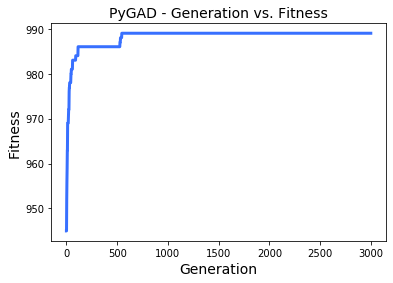

elapsed time:  155.2880289554596
fitness:  7


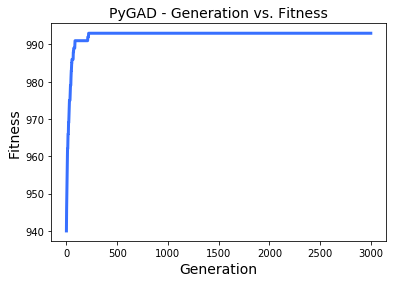

elapsed time:  152.9159779548645
fitness:  11


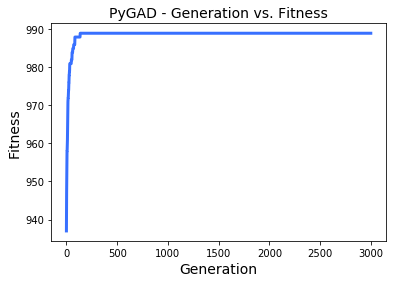

elapsed time:  156.040198802948
fitness:  9


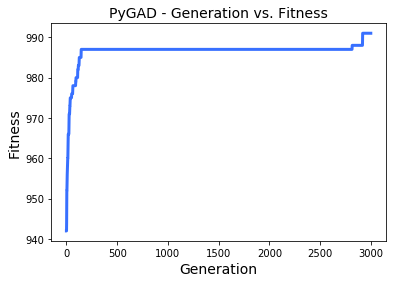

elapsed time:  152.53676891326904
fitness:  10


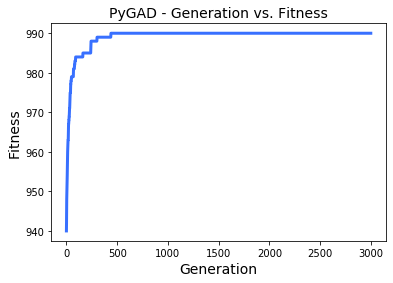

elapsed time:  154.61602997779846
fitness:  8


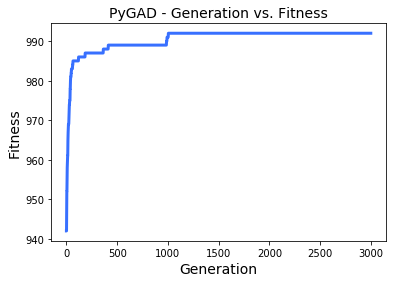

elapsed time:  152.1566047668457
fitness:  11


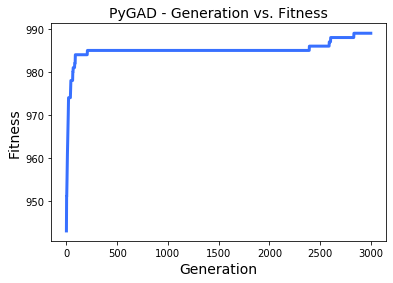

elapsed time:  153.5320918560028
fitness:  11


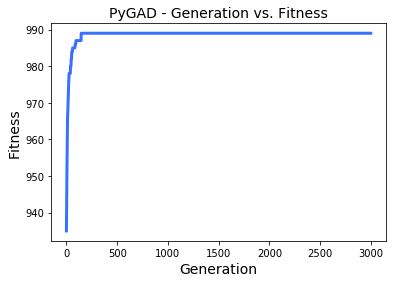

elapsed time:  153.3856897354126
fitness:  11


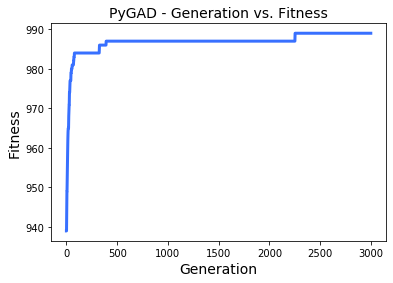

elapsed time:  154.2659478187561
fitness:  7


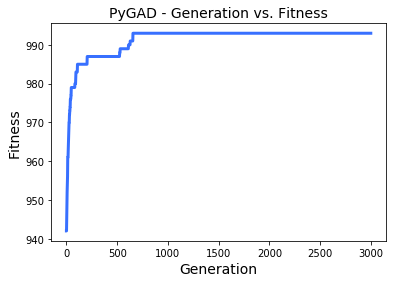

elapsed time:  152.19609999656677
fitness:  5


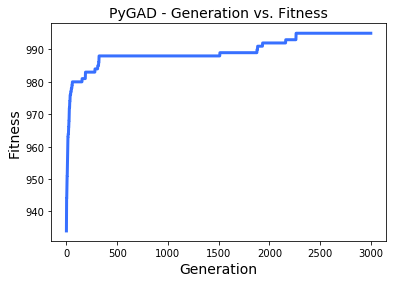

elapsed time:  154.31698727607727
fitness:  13


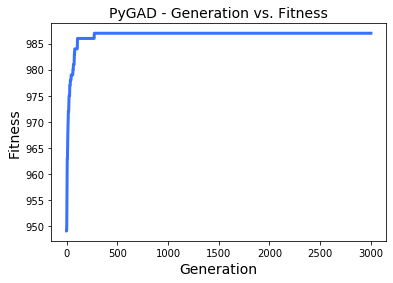

elapsed time:  151.97910523414612
fitness:  11


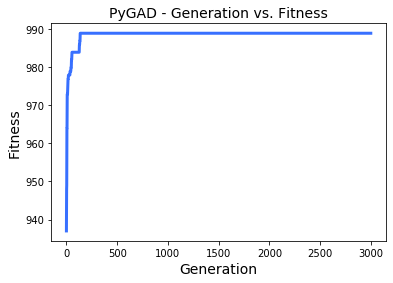

elapsed time:  153.39933705329895
fitness:  9


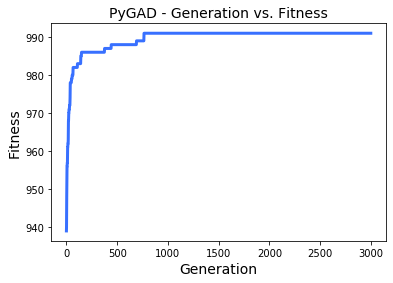

elapsed time:  152.77151894569397
fitness:  8


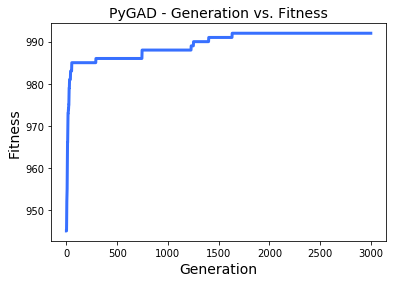

elapsed time:  154.39793419837952
fitness:  10


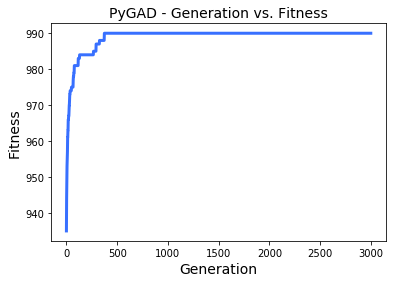

elapsed time:  151.6775779724121
fitness:  8


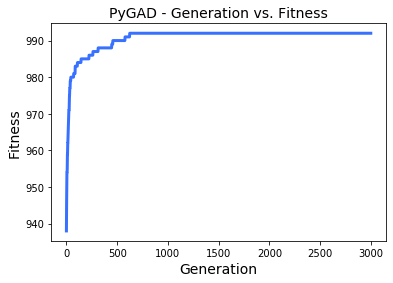

elapsed time:  152.94397687911987
fitness:  12


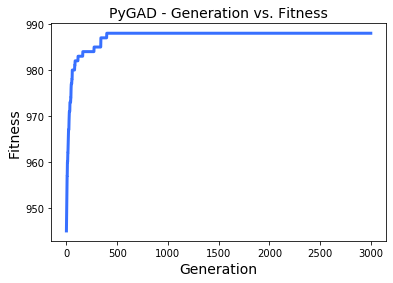

elapsed time:  152.99006700515747
fitness:  8


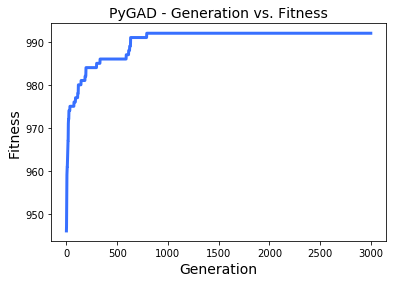

elapsed time:  154.31779408454895
fitness:  10


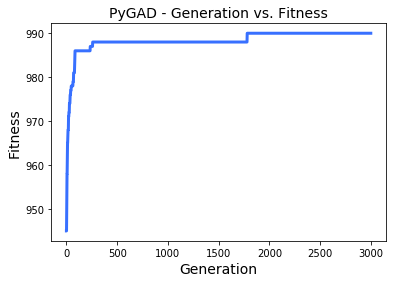

elapsed time:  152.78215980529785
fitness:  12


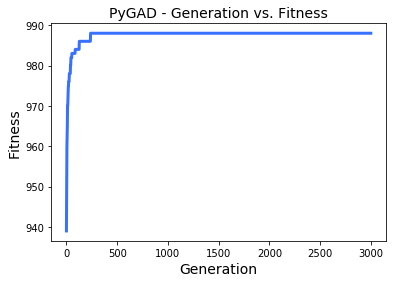

elapsed time:  152.77514481544495
fitness:  11


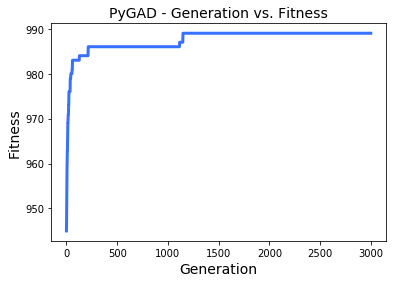

elapsed time:  153.13219499588013
fitness:  11


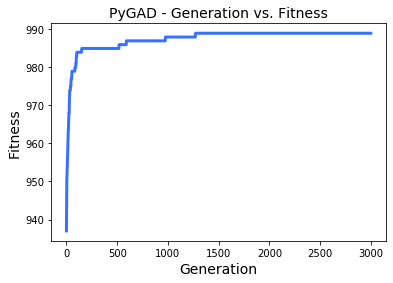

elapsed time:  152.45278096199036
fitness:  9


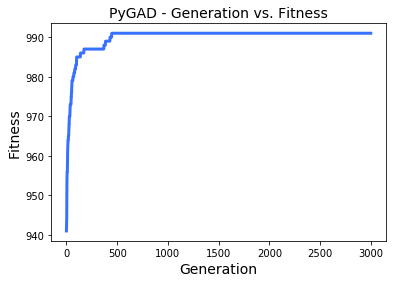

elapsed time:  154.67850589752197
fitness:  12


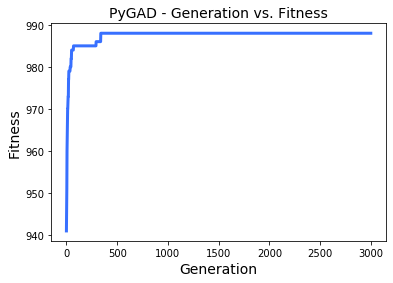

elapsed time:  154.9463050365448
fitness:  8


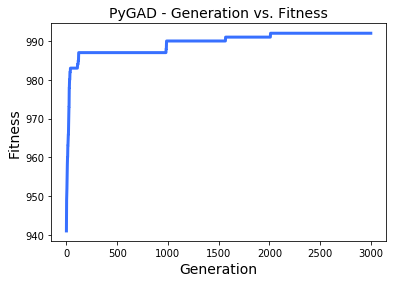

elapsed time:  152.7027871608734
fitness:  11


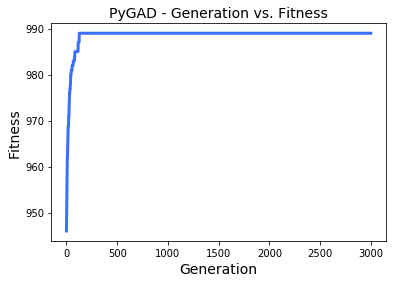

elapsed time:  154.2418372631073
fitness:  10


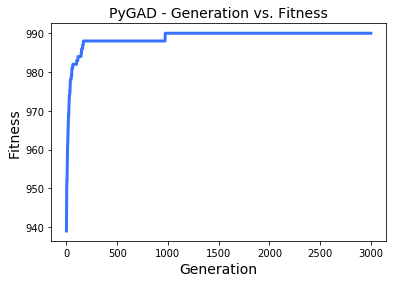

elapsed time:  152.73639106750488
fitness:  7


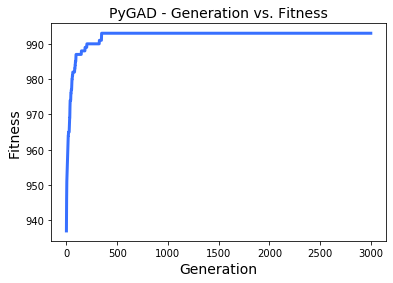

elapsed time:  154.25300908088684
fitness:  15


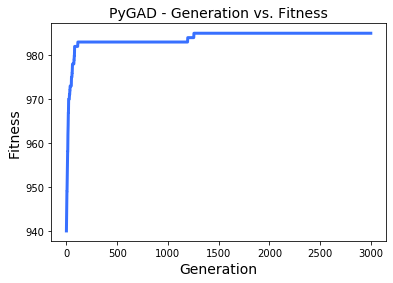

elapsed time:  152.53595328330994
fitness:  5


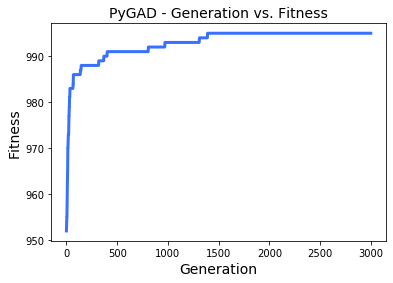

elapsed time:  154.5011432170868
fitness:  16


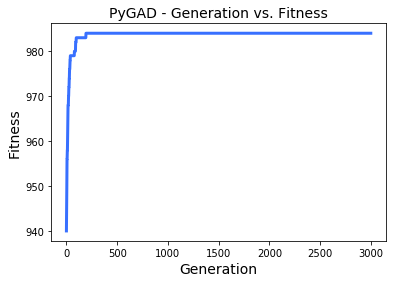

elapsed time:  152.21559286117554
fitness:  10


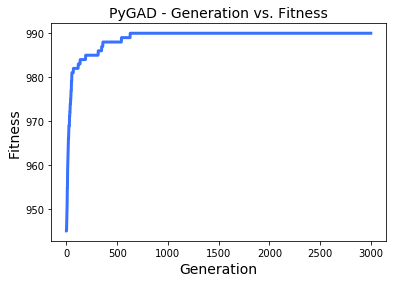

elapsed time:  154.09972190856934
fitness:  10


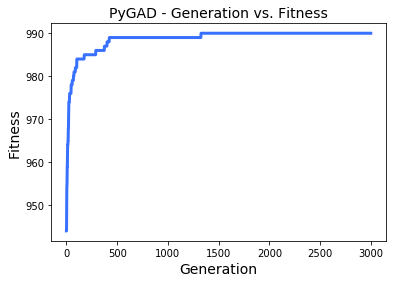

elapsed time:  152.57061886787415
fitness:  8


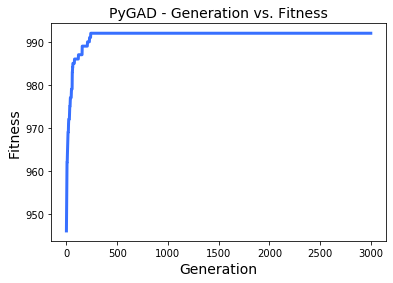

elapsed time:  154.18104600906372
fitness:  10


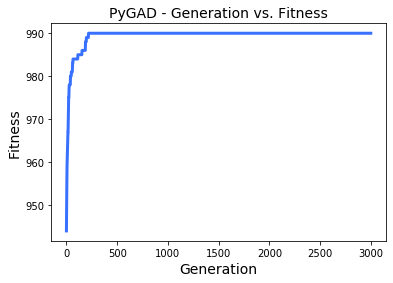

elapsed time:  152.68473291397095
fitness:  9


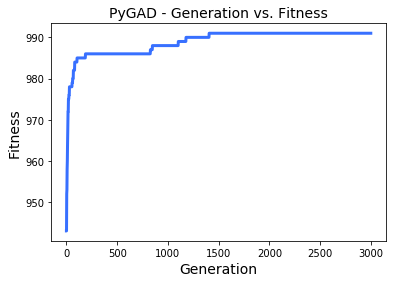

elapsed time:  153.5448567867279
fitness:  10


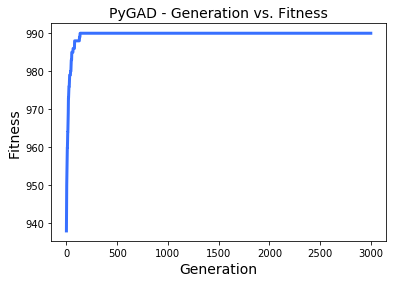

elapsed time:  152.35490608215332
fitness:  12


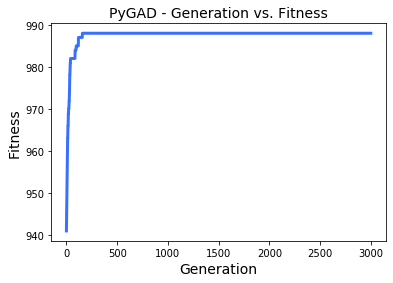

elapsed time:  153.7380530834198
fitness:  14


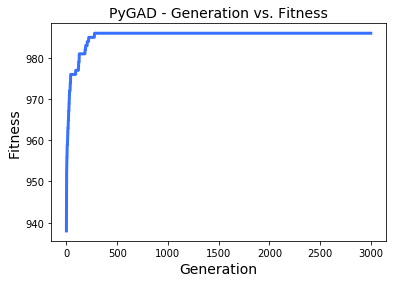

elapsed time:  152.30623483657837
fitness:  12


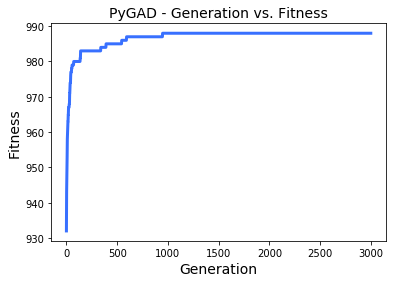

elapsed time:  154.52653288841248
fitness:  10


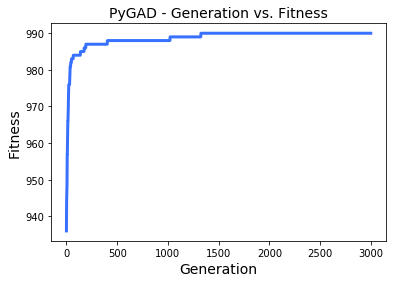

elapsed time:  152.55988097190857
fitness:  9


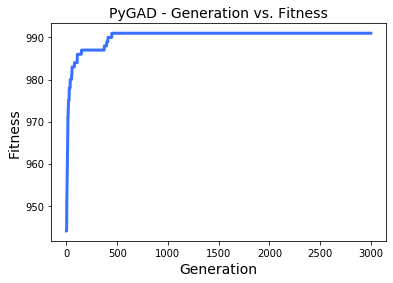

elapsed time:  154.36342883110046
fitness:  10


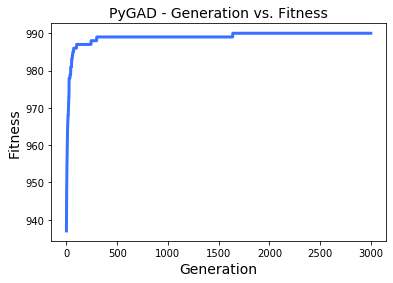

elapsed time:  153.28451418876648
fitness:  12


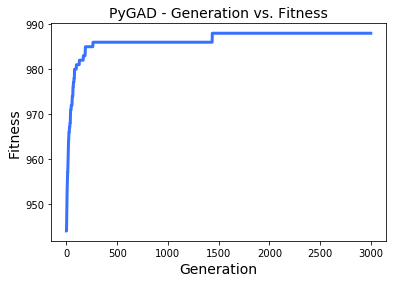

elapsed time:  153.36003398895264
fitness:  9


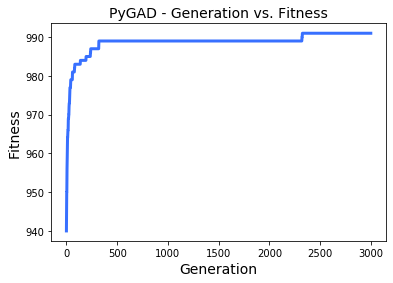

elapsed time:  154.45875310897827
fitness:  13


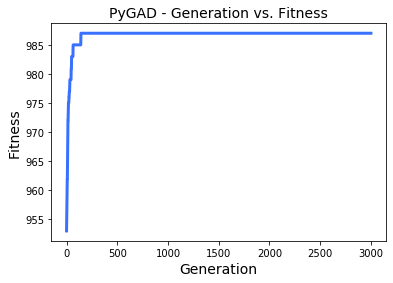

elapsed time:  152.32847809791565
fitness:  13


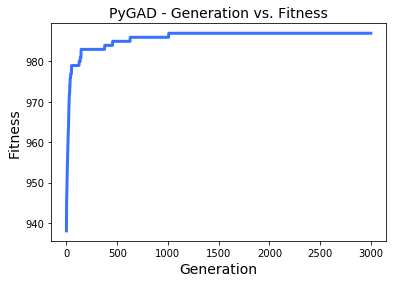

elapsed time:  156.37920212745667
fitness:  13


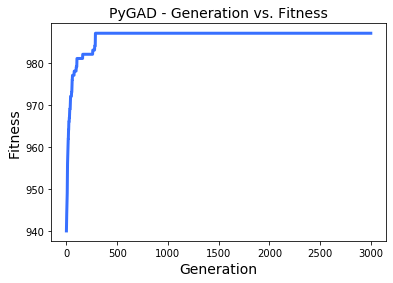

elapsed time:  153.05194091796875
fitness:  12


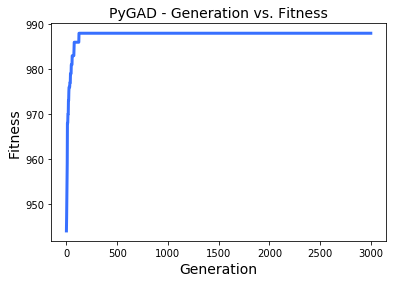

elapsed time:  151.7896590232849
fitness:  13


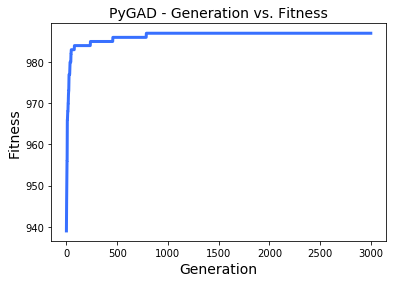

elapsed time:  154.34615397453308
fitness:  12


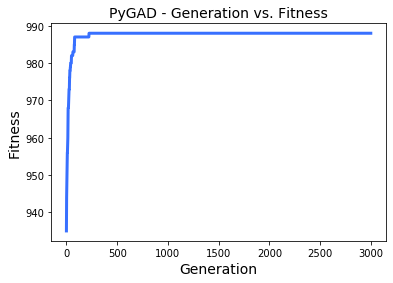

elapsed time:  152.48221015930176
fitness:  13


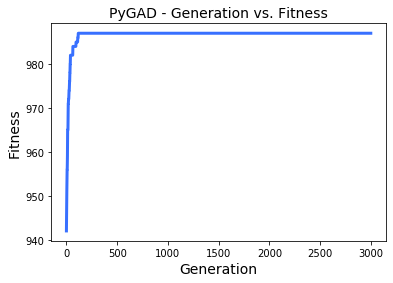

elapsed time:  154.22235012054443
fitness:  13


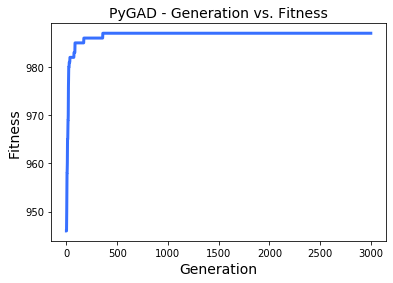

elapsed time:  152.6037139892578
fitness:  12


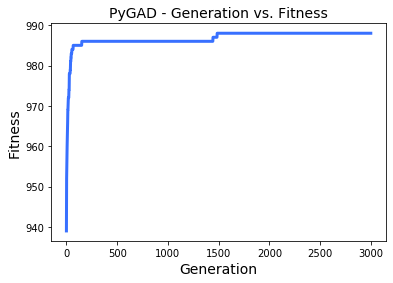

elapsed time:  154.13049507141113
fitness:  13


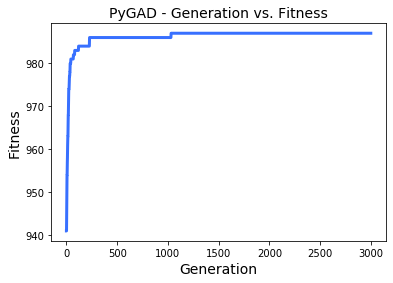

elapsed time:  152.5877330303192
fitness:  12


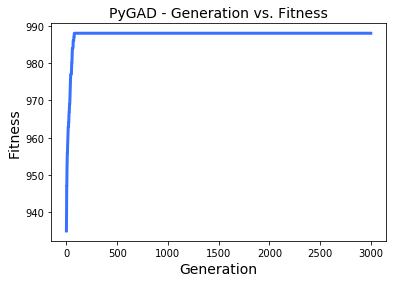

elapsed time:  154.44053411483765
fitness:  12


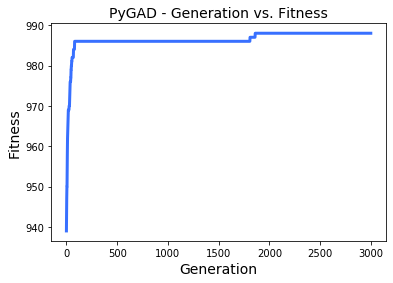

elapsed time:  152.75273394584656
fitness:  10


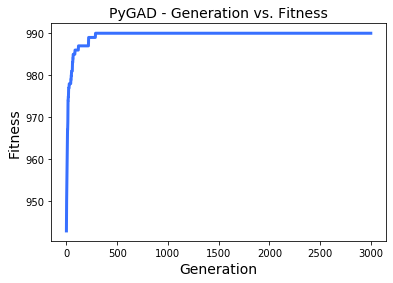

elapsed time:  153.07202315330505
fitness:  13


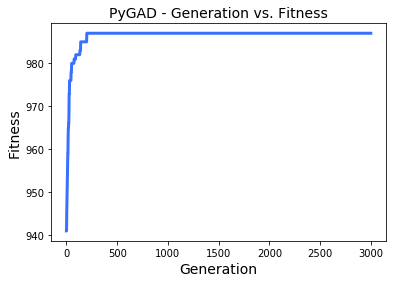

elapsed time:  153.10311722755432
fitness:  15


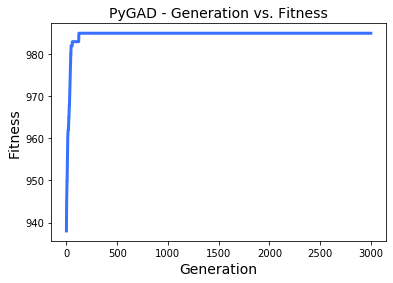

elapsed time:  153.30484914779663
fitness:  11


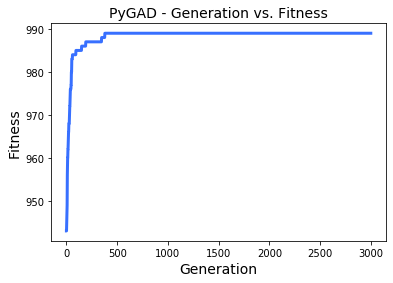

elapsed time:  153.63100695610046
fitness:  13


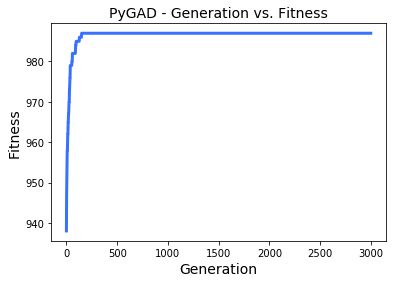

elapsed time:  153.60874795913696
fitness:  10


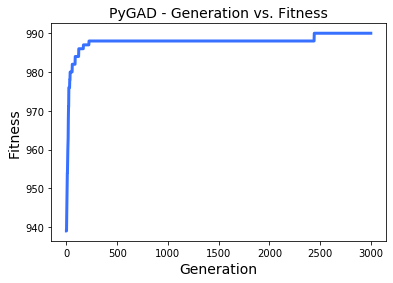

elapsed time:  154.46724390983582
fitness:  11


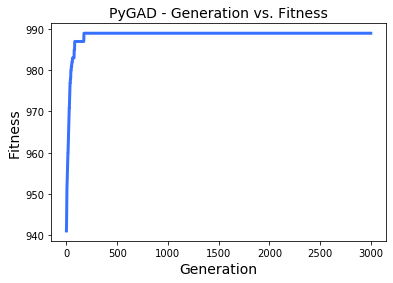

elapsed time:  154.14547491073608
fitness:  11


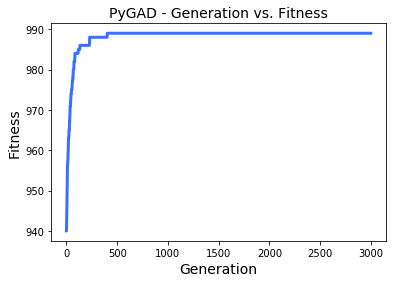

elapsed time:  154.5104308128357
fitness:  11


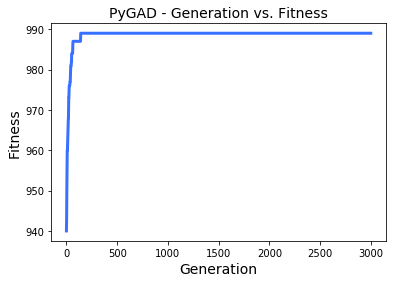

elapsed time:  153.61023807525635
fitness:  11


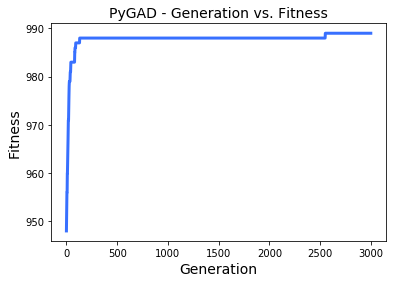

elapsed time:  154.49354910850525
fitness:  14


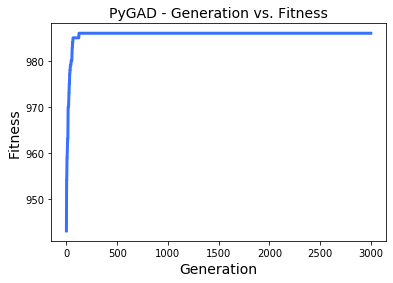

elapsed time:  152.8273389339447
fitness:  12


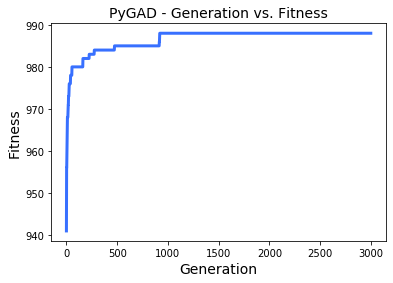

elapsed time:  153.12774395942688
fitness:  13


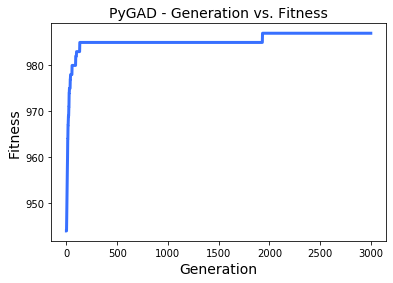

elapsed time:  156.48351001739502
fitness:  11


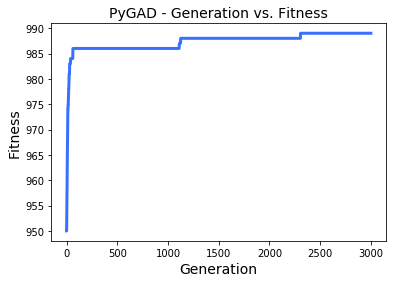

elapsed time:  152.27398896217346
fitness:  12


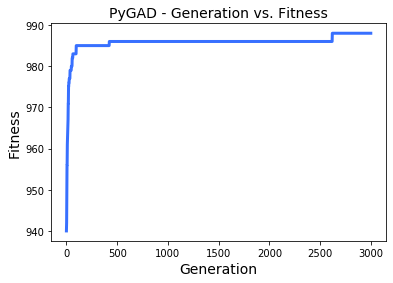

elapsed time:  154.19279837608337
fitness:  7


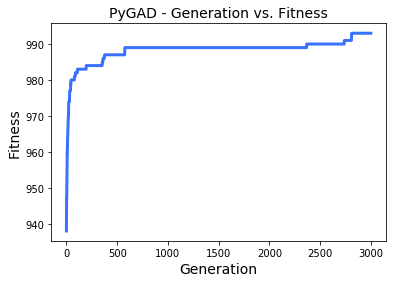

elapsed time:  152.30595993995667
fitness:  13


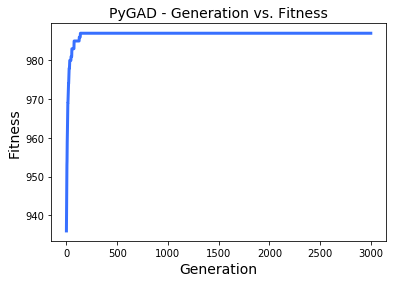

elapsed time:  154.71972393989563
fitness:  10


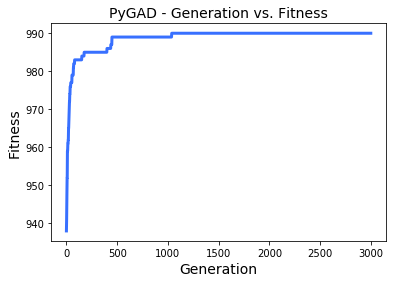

elapsed time:  152.3389608860016
fitness:  11


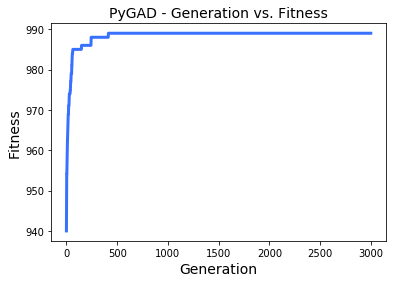

elapsed time:  153.43721890449524
fitness:  14


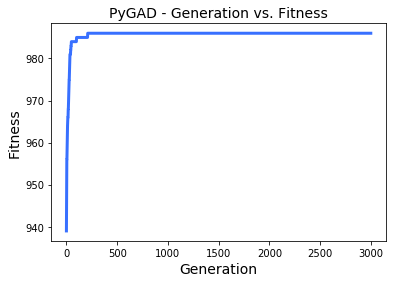

elapsed time:  154.61313104629517
fitness:  8


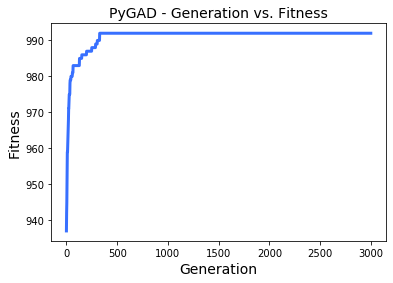

elapsed time:  153.66493487358093
fitness:  12


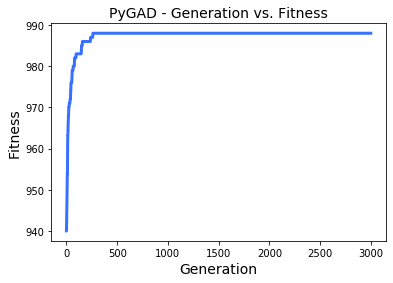

elapsed time:  154.59707021713257
fitness:  10


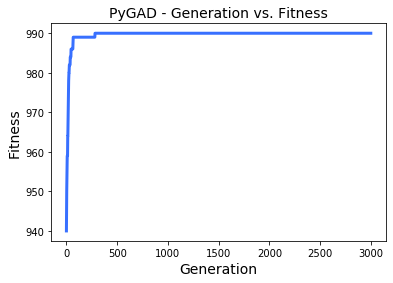

elapsed time:  151.08682298660278
fitness:  11


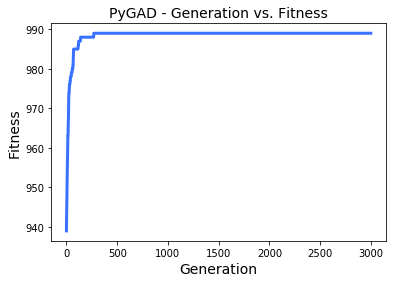

elapsed time:  153.06189703941345
fitness:  13


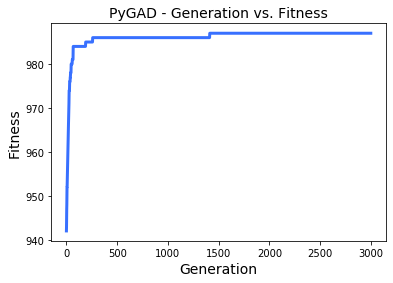

elapsed time:  153.11558079719543
fitness:  15


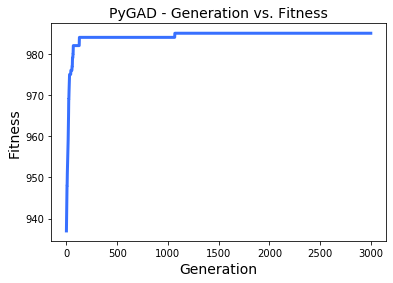

elapsed time:  153.70825123786926
fitness:  12


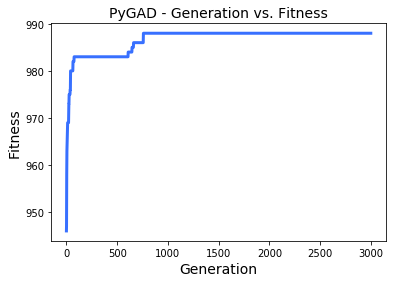

elapsed time:  152.37567687034607
fitness:  13


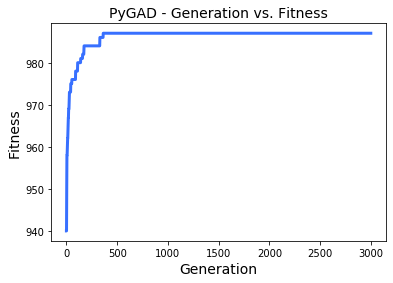

elapsed time:  154.5157721042633
fitness:  13


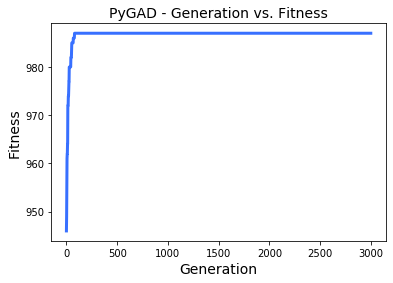

elapsed time:  152.37645292282104
fitness:  9


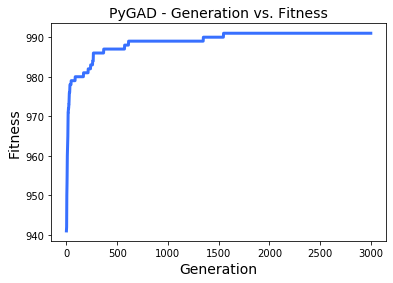

elapsed time:  152.76332592964172
fitness:  10


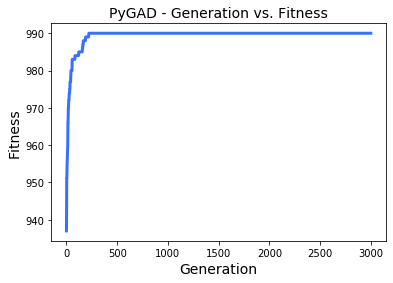

elapsed time:  152.3436951637268
fitness:  12


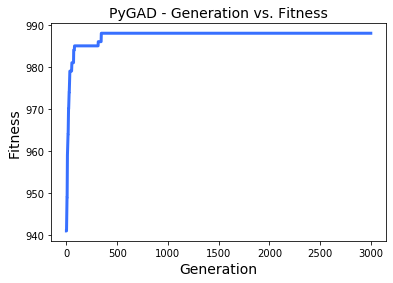

elapsed time:  155.0648548603058
fitness:  10


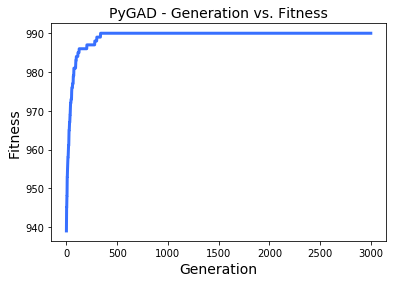

elapsed time:  153.45590496063232
fitness:  12


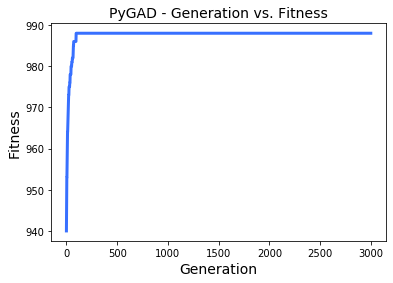

elapsed time:  153.57340788841248
fitness:  7


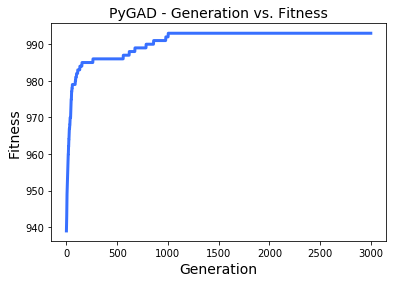

elapsed time:  153.85602688789368
fitness:  12


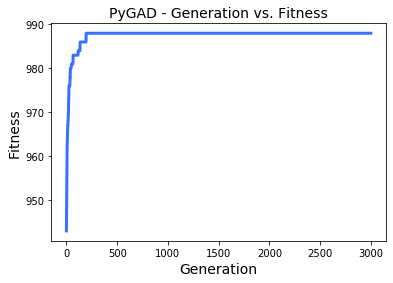

elapsed time:  152.6755359172821
fitness:  15


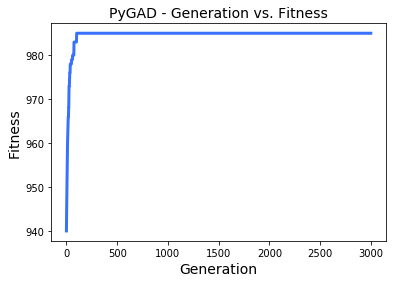

elapsed time:  155.53615283966064
fitness:  14


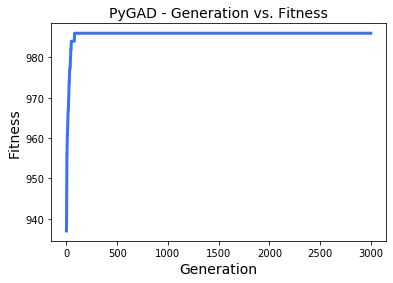

elapsed time:  154.46980690956116
fitness:  12


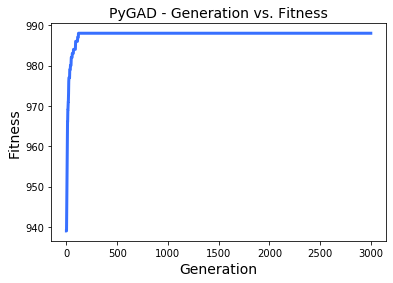

elapsed time:  152.49435591697693
fitness:  10


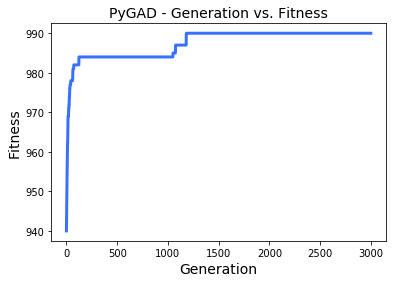

elapsed time:  153.89144206047058
fitness:  10


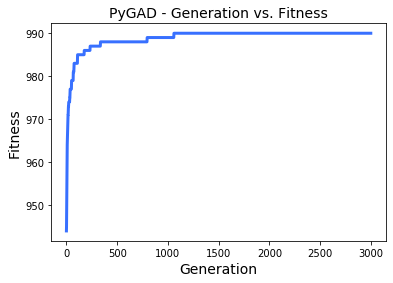

elapsed time:  151.89965176582336
fitness:  8


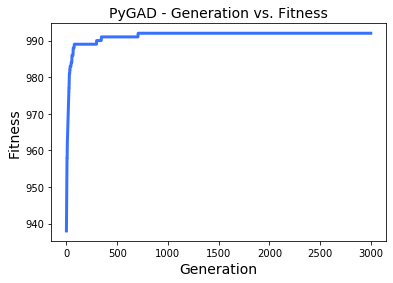

elapsed time:  154.87898182868958
fitness:  9


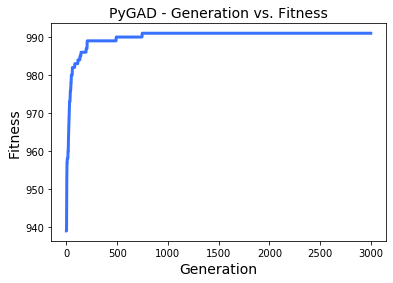

elapsed time:  152.9711139202118
fitness:  10


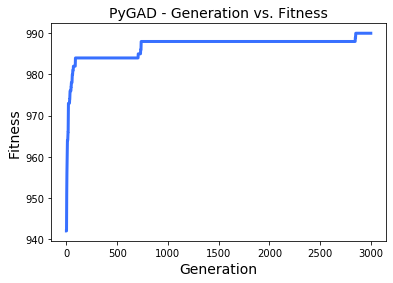

elapsed time:  153.83261489868164
fitness:  13


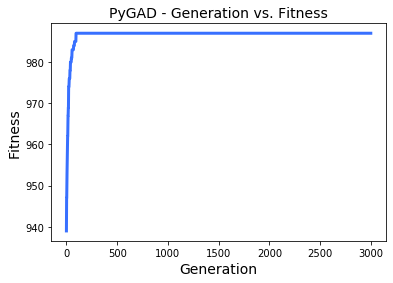

elapsed time:  153.01582956314087
fitness:  7


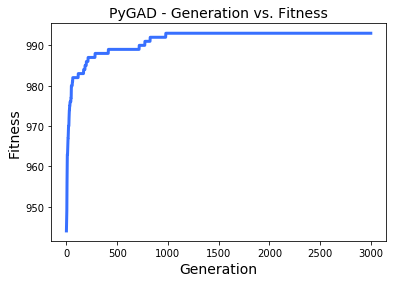

elapsed time:  153.12831711769104
fitness:  14


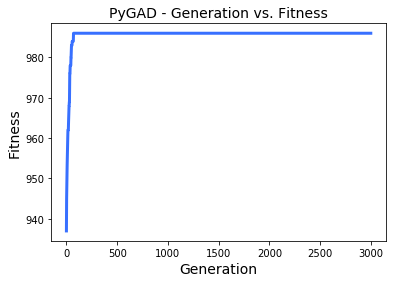

elapsed time:  152.6480929851532
fitness:  11


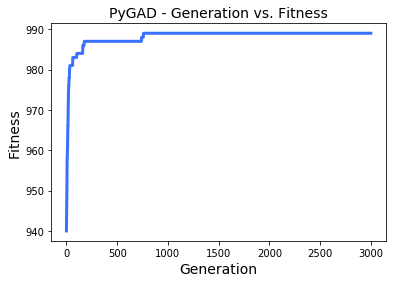

elapsed time:  153.9015417098999
fitness:  12


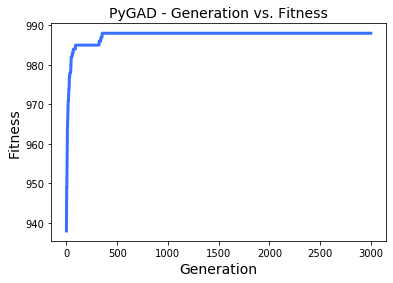

elapsed time:  152.07069897651672
fitness:  16


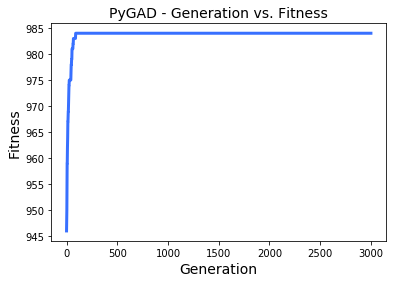

elapsed time:  153.85710883140564
fitness:  11


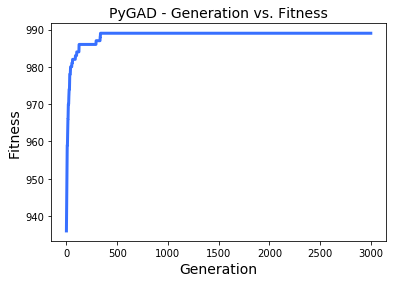

elapsed time:  153.25301313400269
fitness:  9


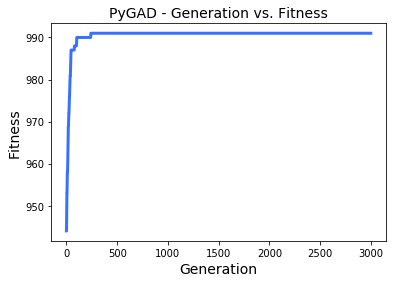

elapsed time:  153.81284189224243
fitness:  9


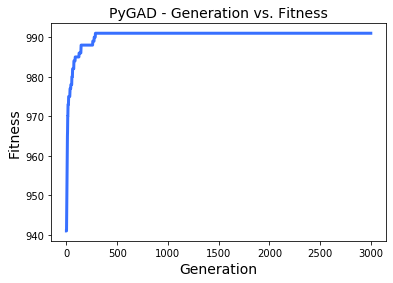

elapsed time:  154.48247408866882
fitness:  10


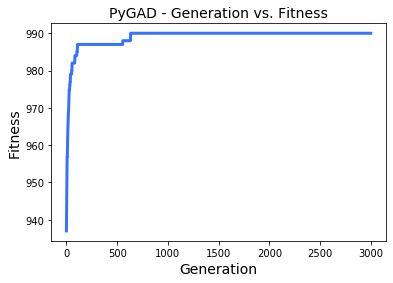

elapsed time:  152.73735189437866
fitness:  12


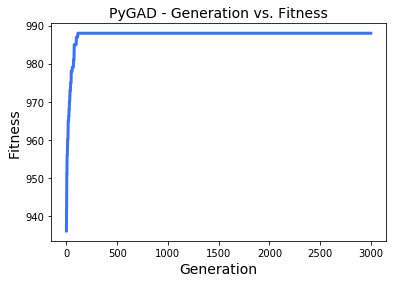

elapsed time:  154.73746991157532
fitness:  8


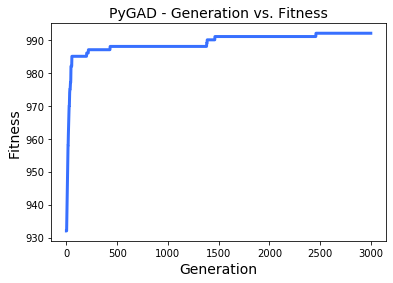

elapsed time:  152.33961820602417
fitness:  9


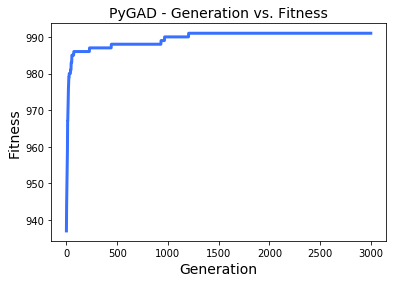

elapsed time:  156.13666605949402
fitness:  11


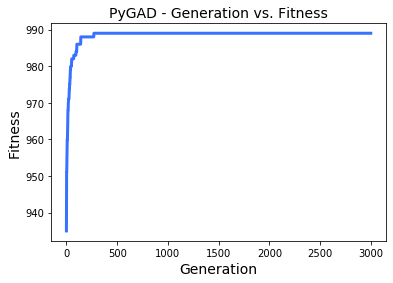

elapsed time:  152.06714797019958
fitness:  14


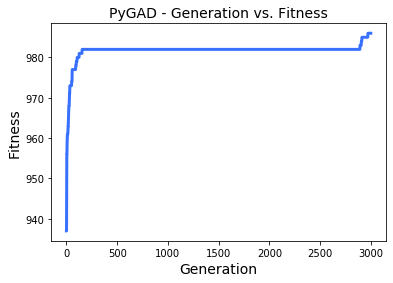

elapsed time:  155.5959107875824
fitness:  10


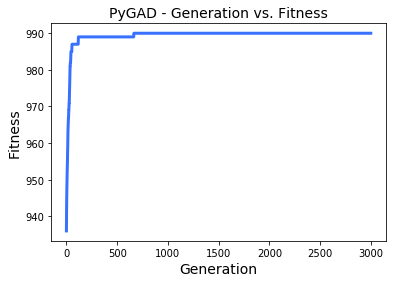

elapsed time:  156.3601770401001
fitness:  8


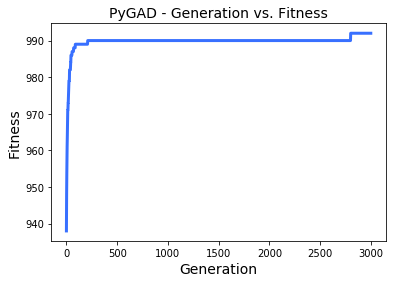

elapsed time:  152.62752413749695
fitness:  8


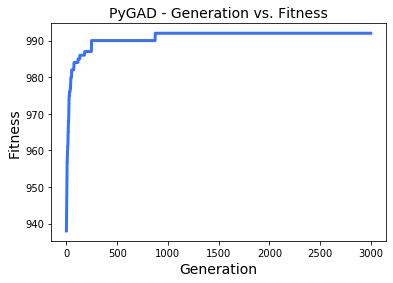

elapsed time:  154.28957986831665
fitness:  13


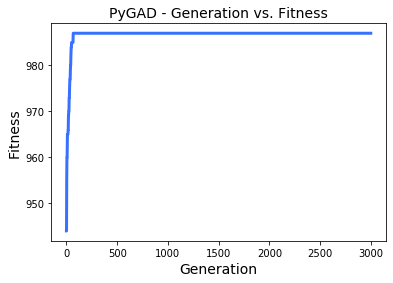

elapsed time:  153.1715259552002
fitness:  15


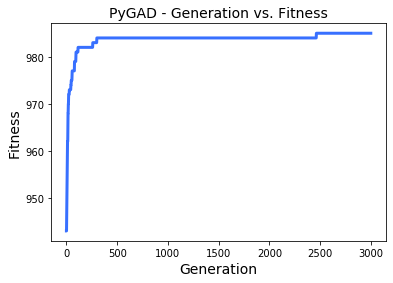

elapsed time:  154.4449601173401
fitness:  9


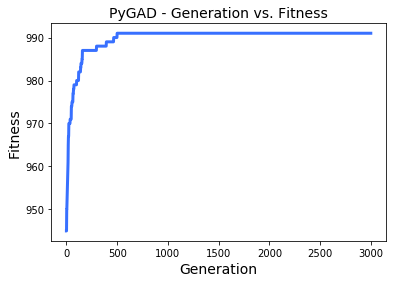

elapsed time:  152.6602041721344
fitness:  10


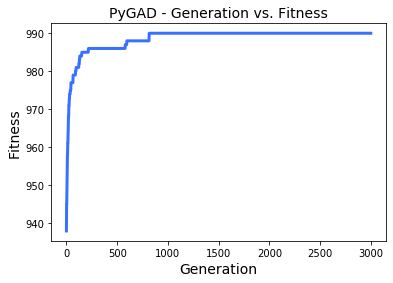

elapsed time:  154.56179308891296
fitness:  12


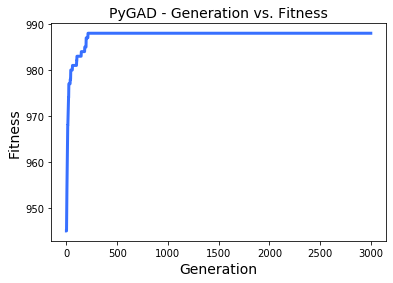

elapsed time:  153.73075795173645
fitness:  13


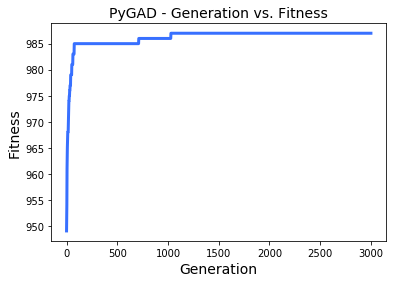

elapsed time:  152.09595131874084
fitness:  15


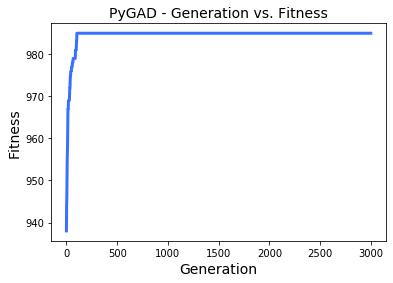

elapsed time:  154.4812982082367
fitness:  10


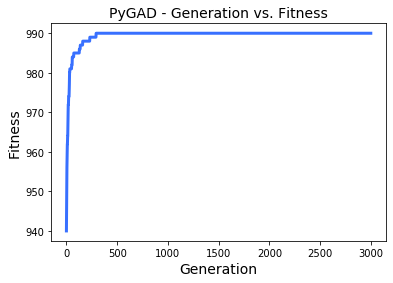

elapsed time:  153.24889397621155
fitness:  10


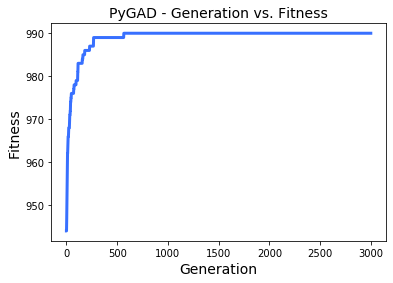

elapsed time:  154.58047103881836
fitness:  9


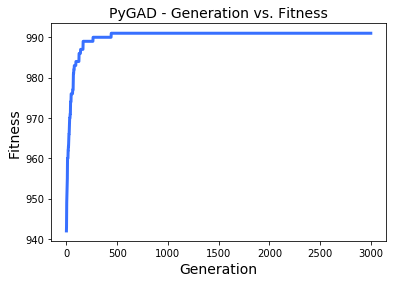

elapsed time:  154.2200677394867
fitness:  10


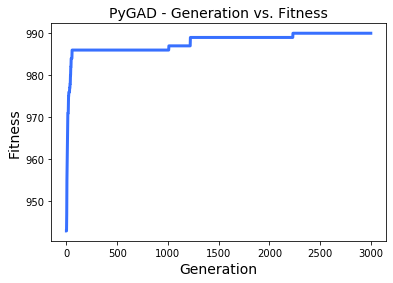

elapsed time:  152.92960691452026
fitness:  12


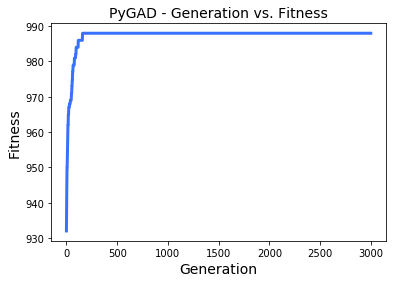

elapsed time:  152.81310892105103
fitness:  6


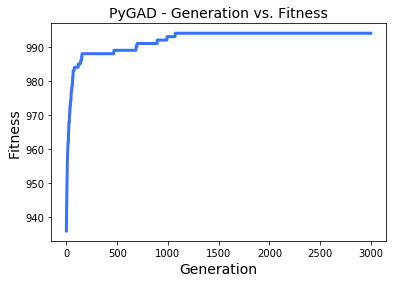

elapsed time:  153.30326294898987
fitness:  9


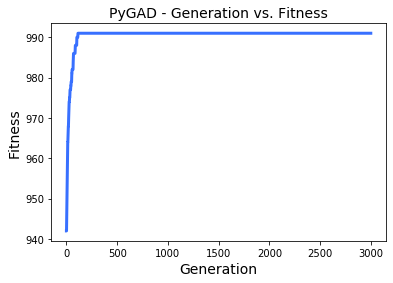

elapsed time:  153.10667419433594
fitness:  8


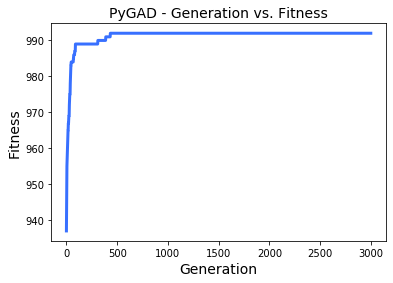

elapsed time:  153.56368398666382
fitness:  16


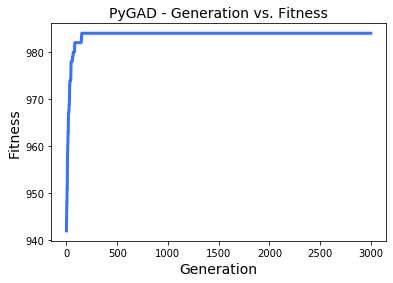

elapsed time:  152.33406686782837
fitness:  8


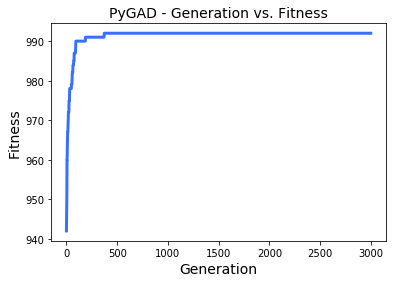

elapsed time:  153.6815688610077
fitness:  10


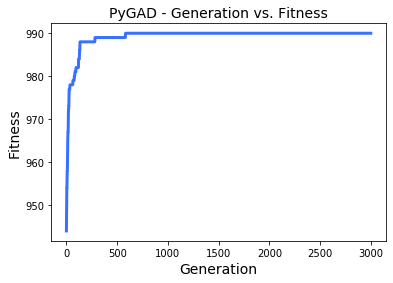

elapsed time:  153.241219997406
fitness:  14


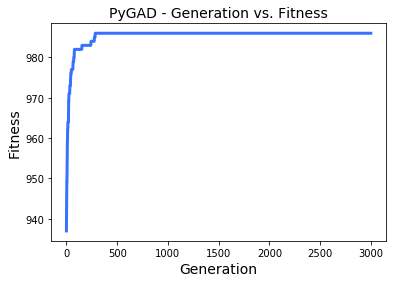

elapsed time:  153.30248498916626
fitness:  13


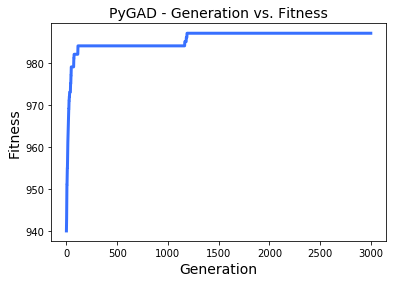

elapsed time:  153.73156881332397
fitness:  17


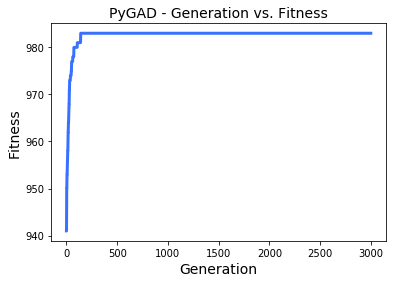

KeyboardInterrupt: 

In [61]:
fitness = 333
count = 0
while fitness !=0:
    count +=1
    ga_instance = pygad.GA(num_generations =3000,

                           fitness_func = fitness2_func,
                           initial_population = init_population(20),
                           gene_type = int,
                           gene_space = [0,1],

                           num_parents_mating = 4,
                           keep_parents=2,                       
                           parent_selection_type="rank",

                           crossover_type = "scattered",           
                           crossover_probability = 0.3,

                           mutation_type = "random",
                           mutation_by_replacement=True,
                           mutation_probability = 0.01,
                           mutation_percent_genes=10,

    )
    t = time.time()
    ga_instance.run()
    elapsed = time.time() - t
    print('elapsed time: ', elapsed)
    best_sol, best_fit, best_index = ga_instance.best_solution()
    fitness = ((1000-fitness2_func(best_sol,best_index)))
    print ('fitness: ', fitness)
    ga_instance.plot_fitness()
tab = lin_to_tab(best_sol)
print ('col:',target_col)
print ('try:',np.sum(tab, dtype = int, axis= 0))
print ('fil:',target_fil)
print ('try:',np.sum(tab, dtype = int, axis = 1))
tab

## conclusiones
Lo mas cerca que nos hemos quedado es 5. la convergencia se  estanca a partir de las 40-60 generaciones

Paso a usar **diferential evolution** esta en scipy.
Bueno, he seguido probando y mejorado algo con la inclusión del crossover scatterd parece que converge mas lentamente, vemos una curva en 100 generaciones.
parent selection= random hace que suba en escalon, practicamente lineal, quedandose alrededor de 20 en 100 generaciones.


#Diferential evolution

In [ ]:
target_fil